In [1]:
# Packages needed for plots and analysis. 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import itertools as it
import seaborn as sns
from pyrolite.plot import pyroplot
import plotly.express as px
from scipy import stats
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

In [2]:

df=pd.read_csv("./kajta_data.csv", sep = ",")
df

,Sample,Material,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,Total %,Ba,Rb,Sr,V,Y,Zn,Zr
0,MST06,Oven Slag,21.50,0.23,4.49,63.27,2.47,0.80,2.46,0.45,1.52,0.61,99.65,709,56,117,47,40,9,139
1,MST07,Oven Slag,22.16,0.36,6.00,63.65,4.94,1.17,3.08,0.11,2.72,0.24,99.47,1046,190,305,61,25,125,528
2,MST08,Oven Slag,23.41,0.36,6.42,54.46,4.62,1.28,3.21,0.11,2.72,0.25,99.60,1082,146,263,59,16,83,263
3,MST09,Oven Slag,20.46,0.17,2.74,76.69,1.14,0.49,1.33,0.11,0.49,0.23,99.79,207,27,150,21,0,106,132
4,MST10,Oven Slag,31.26,0.34,6.21,51.80,3.41,1.14,2.18,0.64,1.38,0.36,99.72,590,57,109,57,69,10,149
5,MST11,Oven Slag,26.49,0.37,5.43,48.14,7.00,0.85,2.74,0.17,2.78,0.39,99.46,539,211,466,54,34,169,441
6,MST12,Smithing Slag,22.33,0.26,5.50,65.10,2.58,1.06,2.42,0.73,1.94,0.21,99.22,681,60,92,48,34,4,130
7,MST13,Smithing Slag,16.20,0.11,1.46,77.00,0.26,0.61,2.79,0.25,0.56,0.21,99.77,258,35,317,25,0,121,142
8,MST14,Smithing Slag,19.16,0.22,3.92,69.11,2.55,0.68,1.35,0.19,1.73,0.28,99.74,373,124,154,32,14,105,202
9,MST15,Smithing Slag,6.94,0.04,0.78,79.27,0.10,0.20,1.13,0.18,0.22,0.26,99.83,142,24,94,5,29,90,52


In [14]:
es = ["SiO2", "Fe2O3","Al2O3"] 
df_n100 = df.loc[:, es].div(df.loc[:, es].sum(axis = 1), axis = 0)*100 # normalization at 100%
df_n100["Material"] = df["Material"].values

colors = ["dodgerblue","red","forestgreen",
          "darkorange","violet","yellowgreen",
          "mediumpurple", "darkblue"]

fig = px.scatter_ternary(df_n100, a="SiO2", b="Fe2O3", c="Al2O3", color='Material',symbol ="Material",
                         size = [1]*df_n100.shape[0], size_max = 6.5)
fig.show()
fig.write_image("kt_n100.png", engine = "kaleido", scale = 5)

[None, None]

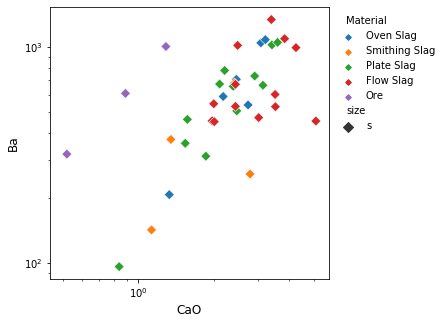

In [4]:
df["size"] = "s"
fig, ax = plt.subplots(1, figsize=(5,5))
sns.scatterplot(data = df, x = "CaO", y = "Ba", hue = "Material", size = "size", sizes ={"s": 50}, ax = ax)
ax.set(yscale="log",xscale="log" )


[None, None]

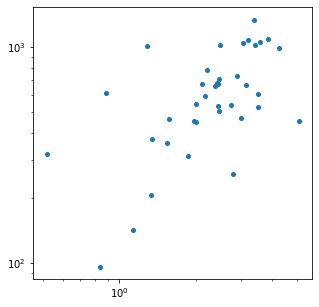

In [5]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.scatter(data = df, x = "CaO", y = "Ba",  marker="o")
#plt.scatter(data = df["Material" == "Smelting Slag"], x = "CaO", y = "Ba",  marker="o")
ax.set(yscale="log",xscale="log" )

In [6]:
df["SiO2 + Al2O3"] = df["SiO2"] + df["Al2O3"]
df["Fe2O3 + MnO"] = df["Fe2O3"] + df["MnO"]

print(df)

   Sample       Material   SiO2  TiO2  Al2O3  Fe2O3   MnO   MgO   CaO  Na2O  \
0   MST06      Oven Slag  21.50  0.23   4.49  63.27  2.47  0.80  2.46  0.45   
1   MST07      Oven Slag  22.16  0.36   6.00  63.65  4.94  1.17  3.08  0.11   
2   MST08      Oven Slag  23.41  0.36   6.42  54.46  4.62  1.28  3.21  0.11   
3   MST09      Oven Slag  20.46  0.17   2.74  76.69  1.14  0.49  1.33  0.11   
4   MST10      Oven Slag  31.26  0.34   6.21  51.80  3.41  1.14  2.18  0.64   
5   MST11      Oven Slag  26.49  0.37   5.43  48.14  7.00  0.85  2.74  0.17   
6   MST12  Smithing Slag  22.33  0.26   5.50  65.10  2.58  1.06  2.42  0.73   
7   MST13  Smithing Slag  16.20  0.11   1.46  77.00  0.26  0.61  2.79  0.25   
8   MST14  Smithing Slag  19.16  0.22   3.92  69.11  2.55  0.68  1.35  0.19   
9   MST15  Smithing Slag   6.94  0.04   0.78  79.27  0.10  0.20  1.13  0.18   
10  MST17     Plate Slag  22.60  0.35   5.88  64.31  4.37  1.01  2.21  0.14   
11  MST18     Plate Slag  18.35  0.16   2.97  77.79 

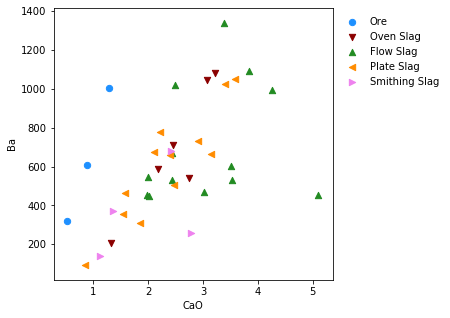

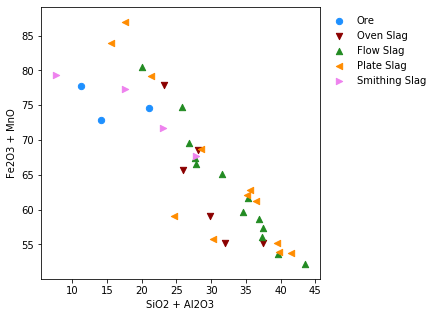

In [7]:
plots = [("CaO","Ba"),("SiO2 + Al2O3","Fe2O3 + MnO")]

colors = ["dodgerblue","darkred","forestgreen",
          "darkorange","violet","yellow",
          "silver", "darkblue"]

materials = ["Ore","Oven Slag",
             "Flow Slag","Plate Slag","Smithing Slag"]

icon = ["o", "v", "^", "<", ">",]

for p in plots:
    e1 = p[0]
    e2 = p[1]
    fig, ax = plt.subplots(1, figsize=(5,5))
    for mat, c, i in zip(materials, colors, icon):
        x = df.loc[df["Material"]== mat, e1]
        y = df.loc[df["Material"]== mat, e2]
        ax.scatter(x, y, label = mat,  color = c,marker=i, s = 40)
    ax.legend()
    #ax.set(yscale="log",xscale="log") 
    plt.xlabel(e1, fontsize=10)
    plt.ylabel(e2, fontsize=10)


In [8]:
dfw=pd.read_csv("./weight.csv", sep = ",")

In [9]:
dfw

,Material,Weight
0,Ore,0.010
1,Ore,0.040
2,Ore,0.175
3,Oven Slag,0.040
4,Oven Slag,0.035
5,Oven Slag,0.020
6,Oven Slag,0.150
7,Oven Slag,0.040
8,Oven Slag,0.360
9,Plate Slag,0.040


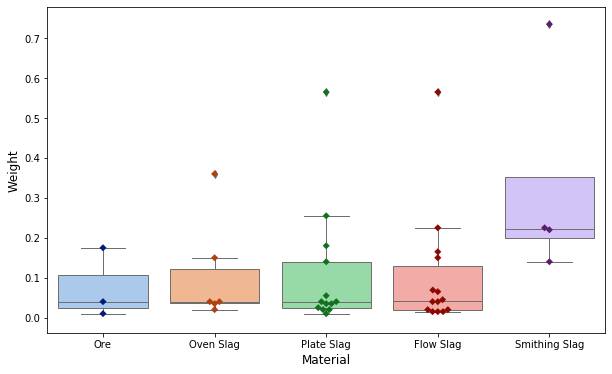

In [10]:
fig, ax = plt.subplots(1, figsize=(10,6))
sns.swarmplot(x = dfw["Material"], y = dfw["Weight"], palette= "dark", ax = ax, color = 0.25)
sns.boxplot(x = dfw["Material"], y = dfw["Weight"], palette= "pastel", ax = ax)